In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

In [5]:
img_size=256
batch_size=32

dataset_path=r"C:\Users\dhanu\OneDrive\Desktop\data"

datagen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    zoom_range=0.2,
    rotation_range=20,
    horizontal_flip=True
)

train_data=datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_data=datagen.flow_from_directory(
    dataset_path,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 6043 images belonging to 2 classes.
Found 1510 images belonging to 2 classes.


In [9]:
model=models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size,3)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
train=model.fit(
    train_data,
    epochs=20,
    validation_data=val_data
)

C:\Users\dhanu\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
165/189 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6865 - loss: 0.9196 

C:\Users\dhanu\anaconda3\Lib\site-packages\PIL\Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


189/189 ━━━━━━━━━━━━━━━━━━━━ 311s 2s/step - accuracy: 0.8042 - loss: 0.4816 - val_accuracy: 0.9060 - val_loss: 0.2347
Epoch 2/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8658 - loss: 0.3099 - val_accuracy: 0.9040 - val_loss: 0.2289
Epoch 3/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.8762 - loss: 0.2955 - val_accuracy: 0.9026 - val_loss: 0.2543
Epoch 4/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8863 - loss: 0.2779 - val_accuracy: 0.9126 - val_loss: 0.2141
Epoch 5/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8900 - loss: 0.2636 - val_accuracy: 0.9278 - val_loss: 0.1951
Epoch 6/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.8984 - loss: 0.2462 - val_accuracy: 0.9318 - val_loss: 0.1950
Epoch 7/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.8992 - loss: 0.2410 - val_accuracy: 0.9305 - val_loss: 0.2059
Epoch 8/20
189/189 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.9007 - loss: 0.2372 - val_accuracy: 0.936

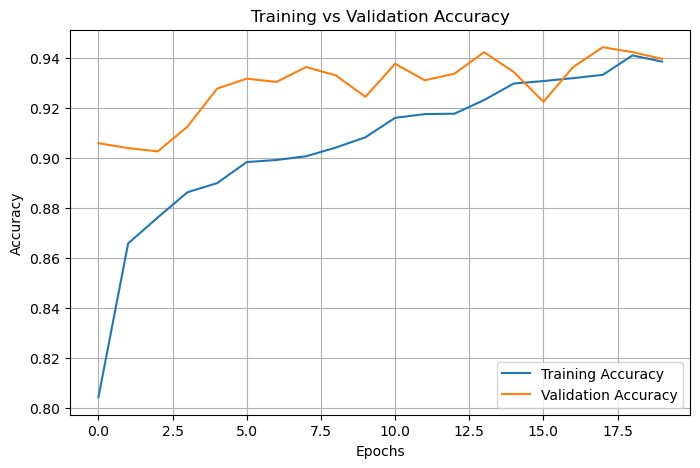

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(train.history['accuracy'], label='Training Accuracy')
plt.plot(train.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()
plt.show()

 visually inspect overfitting (when training accuracy is high but validation is low).

Ideally, both curves should increase and stay close together.

In [13]:
model.save("mask_detector_model.h5")